In [7]:
# import datasets
from sklearn import datasets
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris()

# subset versicolor petal length
def calculatePetalLength(index):
    petal_length_idx = np.where(iris.target==index)[0]
    petal_length = []
    for i in petal_length_idx:
        petal_length.append(iris.data[i, 2])
    return petal_length

versicolor_petal_length = calculatePetalLength(1)

#### Computing the variance
It is important to have some understanding of what commonly-used functions are doing under the hood. Though you may already know how to compute variances, this is a beginner course that does not assume so. In this exercise, we will explicitly compute the variance of the petal length of Iris veriscolor using the equations discussed in the videos. We will then use `np.var()` to compute it.

In [3]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)

0.21640000000000004 0.21640000000000004


#### The standard deviation and the variance
As mentioned in the video, the standard deviation is the square root of the variance. You will see this for yourself by computing the standard deviation using `np.std()` and comparing it to what you get by computing the variance with `np.var()` and then computing the square root.

In [4]:
# Compute the variance: variance
variance  = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.4651881339845203
0.4651881339845203


#### Scatter plots
When you made bee swarm plots, box plots, and ECDF plots in previous exercises, you compared the petal lengths of different species of iris. But what if you want to compare two properties of a single species? This is exactly what we will do in this exercise. We will make a scatter plot of the petal length and width measurements of Anderson's Iris versicolor flowers. If the flower scales (that is, it preserves its proportion as it grows), we would expect the length and width to be correlated.

For your reference, the code used to produce the scatter plot in the video is provided below:

```_ = plt.plot(total_votes/1000, dem_share, marker='.', linestyle='none')```

```_ = plt.xlabel('total votes (thousands)')```

```_ = plt.ylabel('percent of vote for Obama')```

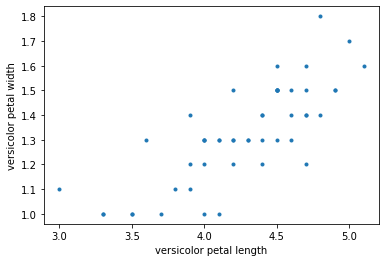

In [8]:
# subset versicolor petal width
def calculatePetalWidth(index):
    petal_width_idx = np.where(iris.target==index)[0]
    petal_width = []
    for i in petal_width_idx:
        petal_width.append(iris.data[i, 3])
    return petal_width

versicolor_petal_width = calculatePetalWidth(1)

# Make a scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker = '.', linestyle = 'none')

# Label the axes
_ = plt.xlabel('versicolor petal length')
_ = plt.ylabel('versicolor petal width')

# Show the result
plt.show()

#### Compute the covariance matrix
Use `np.cov()` to compute the covariance matrix for the petal length (versicolor_petal_length) and width (versicolor_petal_width) of versicolor.
Print the covariance matrix.
Extract the covariance from entry [0,1] of the covariance matrix. Note that by symmetry, entry [1,0] is the same as entry [0,1].
Print the covariance.

In [9]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0, 1]

# Print the length/width covariance
print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


#### Computing the Pearson correlation coefficient
As mentioned in the video, the Pearson correlation coefficient, also called the Pearson r, is often easier to interpret than the covariance. It is computed using the `np.corrcoef()` function. Like `np.cov()`, it takes two arrays as arguments and returns a 2D array. Entries [0,0] and [1,1] are necessarily equal to 1 (can you think about why?), and the value we are after is entry [0,1].

In this exercise, you will write a function, `pearson_r(x, y)` that takes in two arrays and returns the Pearson correlation coefficient. You will then use this function to compute it for the petal lengths and widths of I. versicolor.

In [11]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169
